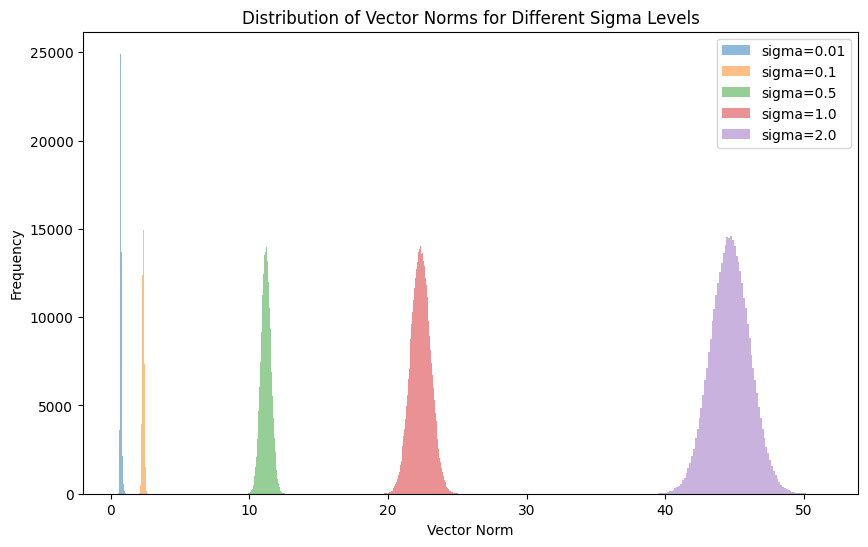

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load entity embeddings (simulate loading as in pretraining_simple_navagent.py)
entities_embeddings_tensor = torch.from_numpy(
    np.load("./models/graph_embeddings/transE_mquake_dim500/entity_embedding.npy")
)  # shape: (num_entities, embedding_dim)

# Use embeddings as mu
mu = entities_embeddings_tensor  # (num_entities, embedding_dim)

# Try different sigma levels
sigmas = [0.01, 0.1, 0.5, 1.0, 2.0]
num_samples = 10

norms_by_sigma = {}

for sigma_val in sigmas:
    sigma = torch.full_like(mu, sigma_val)
    dist = torch.distributions.Normal(mu, sigma)
    # Sample num_samples for each entity
    samples = dist.rsample((num_samples,))  # (num_samples, num_entities, embedding_dim)
    # Compute vector norm for each sample
    norms = torch.linalg.vector_norm(samples, dim=-1)  # (num_samples, num_entities)
    # Flatten all norms for histogram
    norms_by_sigma[sigma_val] = norms.flatten().cpu().numpy()

# Plot
plt.figure(figsize=(10, 6))
for sigma_val, norms in norms_by_sigma.items():
    plt.hist(norms, bins=100, alpha=0.5, label=f'sigma={sigma_val}')
plt.xlabel('Vector Norm')
plt.ylabel('Frequency')
plt.title('Distribution of Vector Norms for Different Sigma Levels')
plt.legend()
plt.show()